<a href="https://colab.research.google.com/github/srikrishnasajjarao/snooker_ball_tracking/blob/main/Grounding_DINO_%26_SAM_to_Extract_Object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Jan 15 13:25:00 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

fatal: destination path 'GroundingDINO' already exists and is not an empty directory.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done


In [4]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-guokef7d
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-guokef7d
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


In [5]:
!pip install torch

In [6]:
!pip install torchvision

In [7]:
!pip install supervision==0.12.0

  Using cached supervision-0.12.0-py3-none-any.whl.metadata (12 kB)
Using cached supervision-0.12.0-py3-none-any.whl (48 kB)
  Attempting uninstall: supervision
    Found existing installation: supervision 0.4.0
    Uninstalling supervision-0.4.0:
      Successfully uninstalled supervision-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.12.0 which is incompatible.


In [8]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [9]:
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [10]:
%cd {HOME}
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

/content
cuda:0


In [11]:
GROUNDING_DINO_CONFIG_PATH = '/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py'
GROUNDING_DINO_CHECKPOINT_PATH = '/content/weights/groundingdino_swint_ogc.pth'

In [12]:
from groundingdino.util.inference import Model
GD_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)


/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/content/GroundingDINO/groundingdino/util/inference.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_checkpoint_path, map_location="cpu")


In [15]:
from google.colab import files
import cv2

# Upload the image
uploaded = files.upload()

# Get the filename of the uploaded image
filename = list(uploaded.keys())[0]
image_bgr = cv2.imread(filename)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_original = image_bgr

print(image_bgr.shape)

image_bgr = cv2.resize(image_bgr, (1024, 1024))
image_rgb = cv2.resize(image_rgb, (1024, 1024))
image_original = cv2.resize(image_original, (1024, 1024))

print(image_bgr.shape)



Saving 30.png to 30.png
(662, 1000, 3)
(1024, 1024, 3)


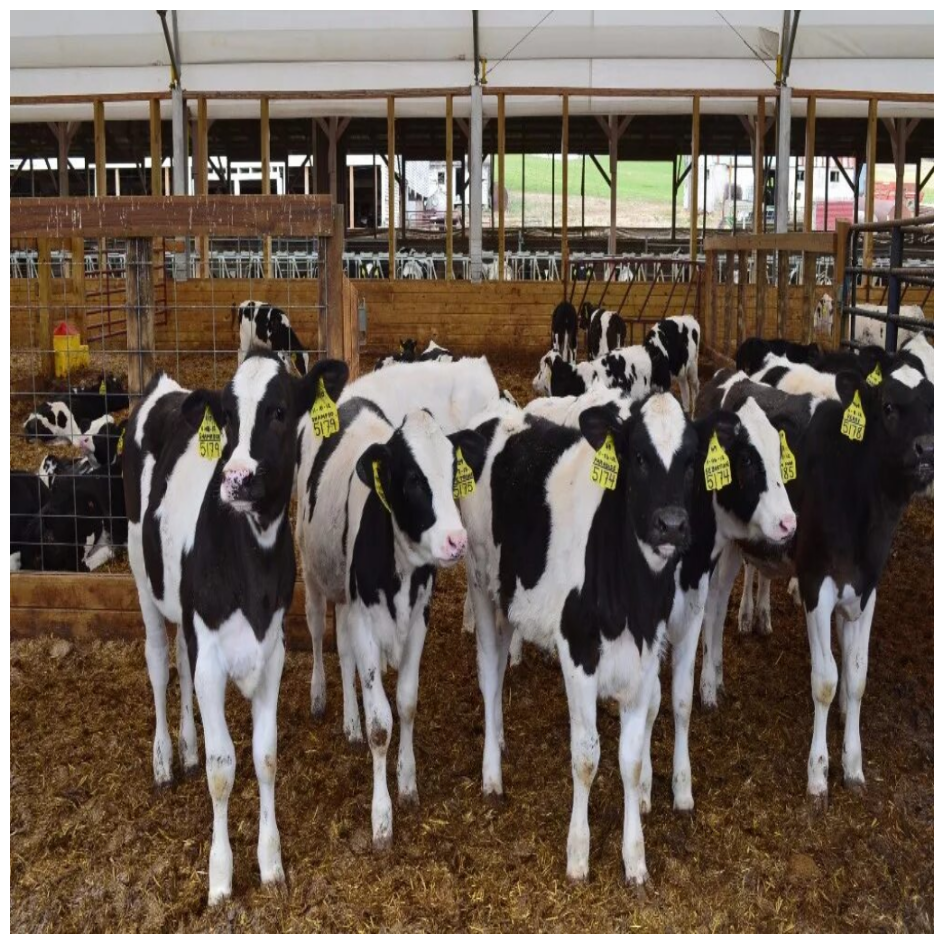

In [16]:
import supervision as sv
sv.plot_image(image_bgr)

In [33]:
# detect objects
CLASSES = ['cow', 'ear']
detections = GD_model.predict_with_classes(
    image=image_rgb,
    classes=CLASSES,
    box_threshold=0.25,
    text_threshold=0.25
)

print(detections)

Detections(xyxy=array([[1.2191805e+02, 3.7277667e+02, 3.7589996e+02, 9.9591193e+02],
       [4.8276227e+02, 4.1612253e+02, 8.1195880e+02, 9.7382312e+02],
       [7.9960608e+02, 3.5593015e+02, 1.0228042e+03, 8.8798730e+02],
       [3.1397794e+02, 3.7821255e+02, 5.4637561e+02, 9.3337964e+02],
       [6.2863354e+02, 4.3440396e+02, 6.8378687e+02, 4.8948813e+02],
       [1.1229343e+02, 3.2647760e+02, 1.0221687e+03, 9.9401764e+02],
       [5.7736884e+02, 3.3544586e+02, 7.6661041e+02, 4.4054541e+02],
       [1.8803432e+02, 4.1709711e+02, 2.4007893e+02, 4.6712244e+02],
       [3.1853055e+02, 3.8490146e+02, 3.7631137e+02, 4.4547592e+02],
       [3.8181949e+02, 4.7805560e+02, 4.3029916e+02, 5.6114386e+02],
       [3.8145700e+02, 4.7805493e+02, 4.2363779e+02, 5.3248926e+02],
       [4.8145847e+02, 4.6117203e+02, 5.3081061e+02, 5.2219983e+02],
       [7.5441992e+02, 4.4113379e+02, 8.1228748e+02, 4.8371722e+02],
       [2.4602142e+02, 3.1898776e+02, 3.2986316e+02, 4.0469205e+02],
       [1.6133118e

In [34]:
print(detections.xyxy, type(detections.xyxy))
detected_boxes = detections.xyxy
class_id = detections.class_id
print(class_id)

[[1.2191805e+02 3.7277667e+02 3.7589996e+02 9.9591193e+02]
 [4.8276227e+02 4.1612253e+02 8.1195880e+02 9.7382312e+02]
 [7.9960608e+02 3.5593015e+02 1.0228042e+03 8.8798730e+02]
 [3.1397794e+02 3.7821255e+02 5.4637561e+02 9.3337964e+02]
 [6.2863354e+02 4.3440396e+02 6.8378687e+02 4.8948813e+02]
 [1.1229343e+02 3.2647760e+02 1.0221687e+03 9.9401764e+02]
 [5.7736884e+02 3.3544586e+02 7.6661041e+02 4.4054541e+02]
 [1.8803432e+02 4.1709711e+02 2.4007893e+02 4.6712244e+02]
 [3.1853055e+02 3.8490146e+02 3.7631137e+02 4.4547592e+02]
 [3.8181949e+02 4.7805560e+02 4.3029916e+02 5.6114386e+02]
 [3.8145700e+02 4.7805493e+02 4.2363779e+02 5.3248926e+02]
 [4.8145847e+02 4.6117203e+02 5.3081061e+02 5.2219983e+02]
 [7.5441992e+02 4.4113379e+02 8.1228748e+02 4.8371722e+02]
 [2.4602142e+02 3.1898776e+02 3.2986316e+02 4.0469205e+02]
 [1.6133118e-01 4.9035156e+02 1.3066364e+02 6.2400952e+02]
 [7.5522528e+02 3.9420105e+02 8.9445526e+02 7.7474512e+02]] <class 'numpy.ndarray'>
[0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 

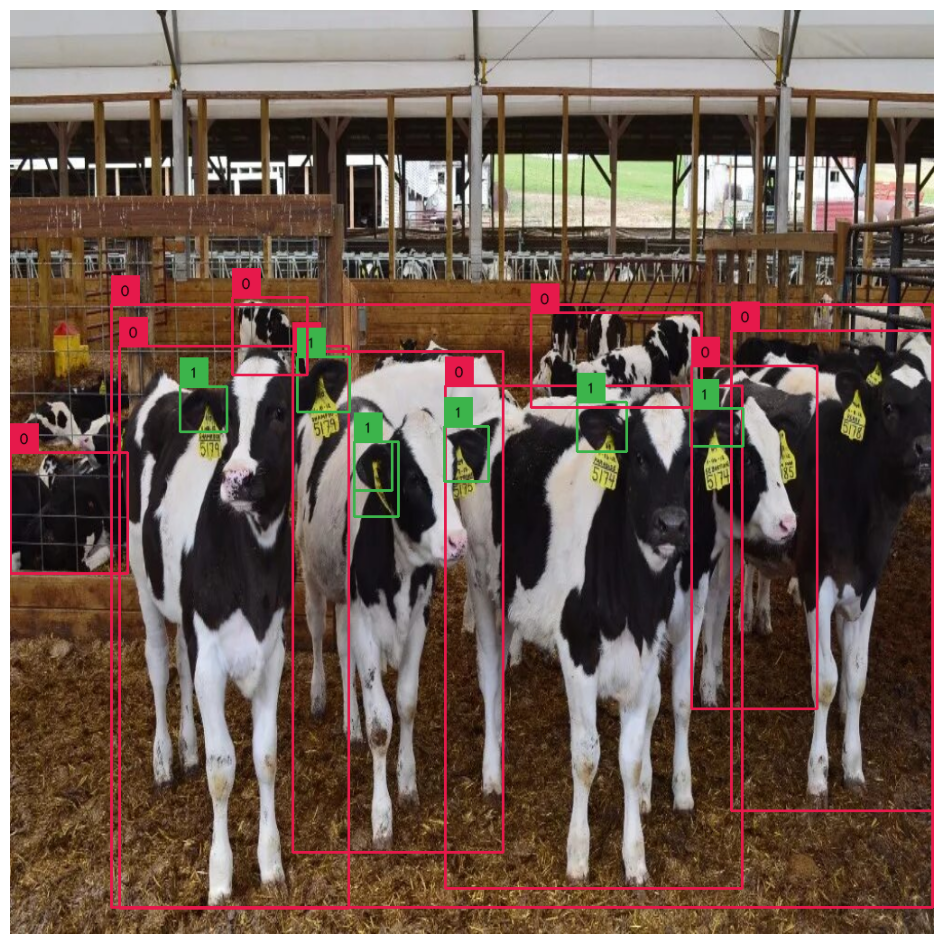

In [35]:
import supervision as sv
box_annotator = sv.BoxAnnotator()
annotated_frame = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=False, labels=CLASSES)
sv.plot_image(annotated_frame)


In [36]:
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = '/content/weights/sam_vit_h_4b8939.pth'

from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

mask_predictor = SamPredictor(sam)


In [37]:
import numpy as np
mask_annotator =  sv.MaskAnnotator(color=sv.Color.blue())
segmented_mask = []
counter = 0
for mybox in detected_boxes:
    mybox = np.array(mybox)
    print(mybox)


    mask_predictor.set_image(image_rgb)
    masks, scores, logits = mask_predictor.predict(
        point_coords=None,
        point_labels=None,
        box=mybox,
        multimask_output=False
    )

    segmented_mask.append(masks)
    print(len(masks), masks.shape)

# plot mask on image using supervision
    detections = sv.Detections(
        xyxy=sv.mask_to_xyxy(masks=masks),
        mask=masks
    )

    detections = detections[detections.area == np.max(detections.area)]
    print(CLASSES[class_id[counter]])

    annotated_image = box_annotator.annotate(scene=image_original.copy(), detections=detections, skip_label=False, labels=[CLASSES[class_id[counter]]])
    annotated_image = mask_annotator.annotate(scene=annotated_image.copy(), detections=detections)
    image_original = annotated_image

    counter+=1

[121.91805 372.77667 375.89996 995.9119 ]
1 (1, 1024, 1024)
cow
[482.76227 416.12253 811.9588  973.8231 ]
1 (1, 1024, 1024)
cow
[ 799.6061   355.93015 1022.8042   887.9873 ]
1 (1, 1024, 1024)
cow
[313.97794 378.21255 546.3756  933.37964]
1 (1, 1024, 1024)
cow
[628.63354 434.40396 683.78687 489.48813]
1 (1, 1024, 1024)
ear
[ 112.29343  326.4776  1022.1687   994.01764]
1 (1, 1024, 1024)
cow
[577.36884 335.44586 766.6104  440.5454 ]
1 (1, 1024, 1024)
cow
[188.03432 417.0971  240.07893 467.12244]
1 (1, 1024, 1024)
ear
[318.53055 384.90146 376.31137 445.47592]
1 (1, 1024, 1024)
ear
[381.8195  478.0556  430.29916 561.14386]
1 (1, 1024, 1024)
ear
[381.457   478.05493 423.6378  532.48926]
1 (1, 1024, 1024)
ear
[481.45847 461.17203 530.8106  522.1998 ]
1 (1, 1024, 1024)
ear
[754.4199  441.1338  812.2875  483.71722]
1 (1, 1024, 1024)
ear
[246.02142 318.98776 329.86316 404.69205]
1 (1, 1024, 1024)
cow
[1.6133118e-01 4.9035156e+02 1.3066364e+02 6.2400952e+02]
1 (1, 1024, 1024)
cow
[755.2253  394.2

Plot image using Supervion

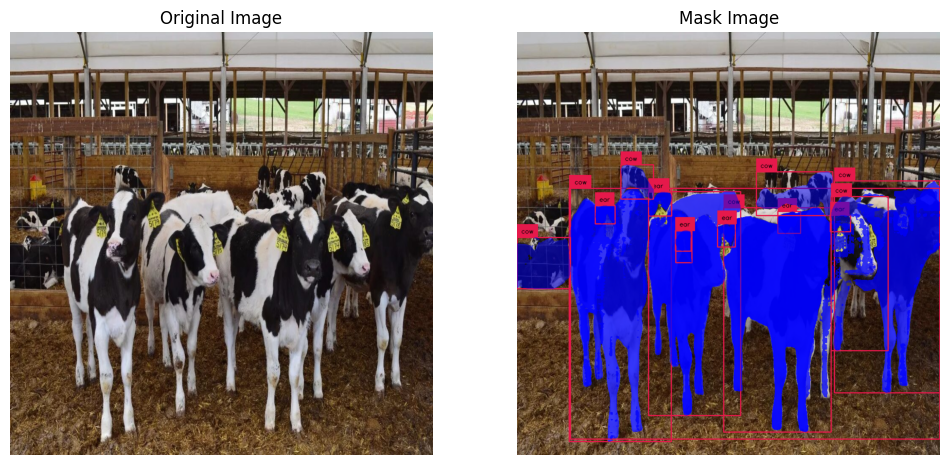

In [38]:
sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1,2),
    titles=['Original Image', 'Mask Image']

)


In [39]:
print(len(segmented_mask), type(segmented_mask[0]), segmented_mask[0].shape)

for i in range(len(segmented_mask)):

  segmented_mask[i] = segmented_mask[i].transpose(1,2,0)
  segmented_mask[i] = np.array(segmented_mask[i]*255).astype('uint8')
  segmented_mask[i]  = cv2.cvtColor(segmented_mask[i] , cv2.COLOR_GRAY2BGR)


print(segmented_mask[0].shape)

16 <class 'numpy.ndarray'> (1, 1024, 1024)
(1024, 1024, 3)


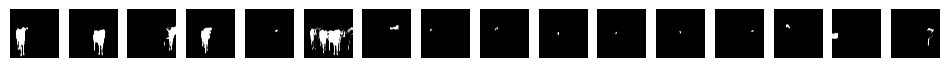

In [40]:
sv.plot_images_grid(
    images=segmented_mask,
    grid_size=(1, len(segmented_mask)),

)

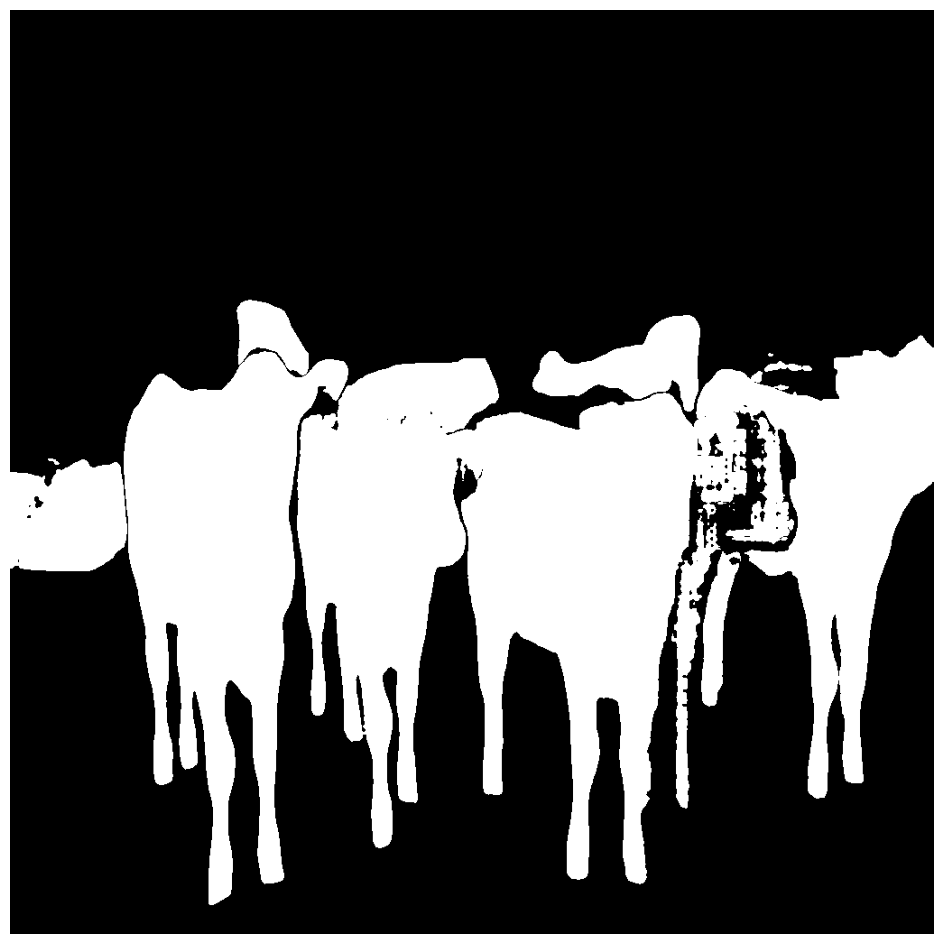

In [41]:
segmented_image = segmented_mask[0]

for i in range(len(segmented_mask)):
  try:
    segmented_image = cv2.bitwise_or(segmented_image, segmented_mask[i+1])
  except:
    pass

sv.plot_image(segmented_image)

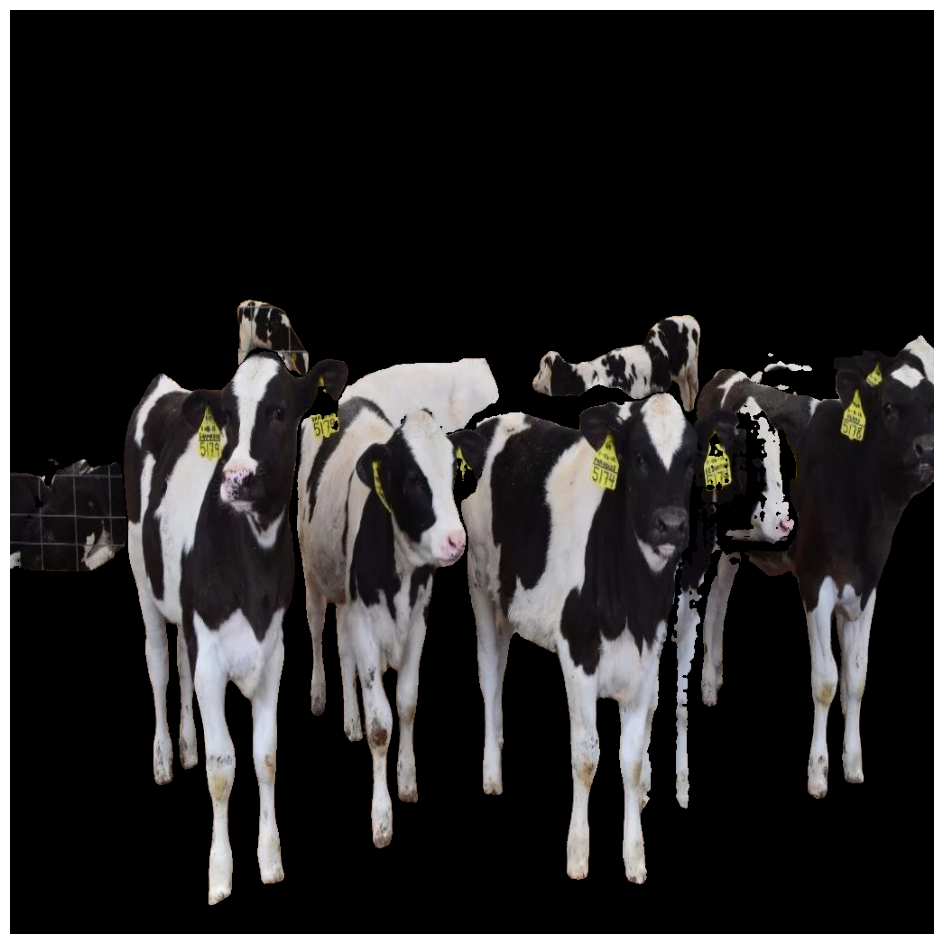

In [42]:
segmented_image = cv2.bitwise_and(segmented_image, image_bgr)
sv.plot_image(segmented_image)

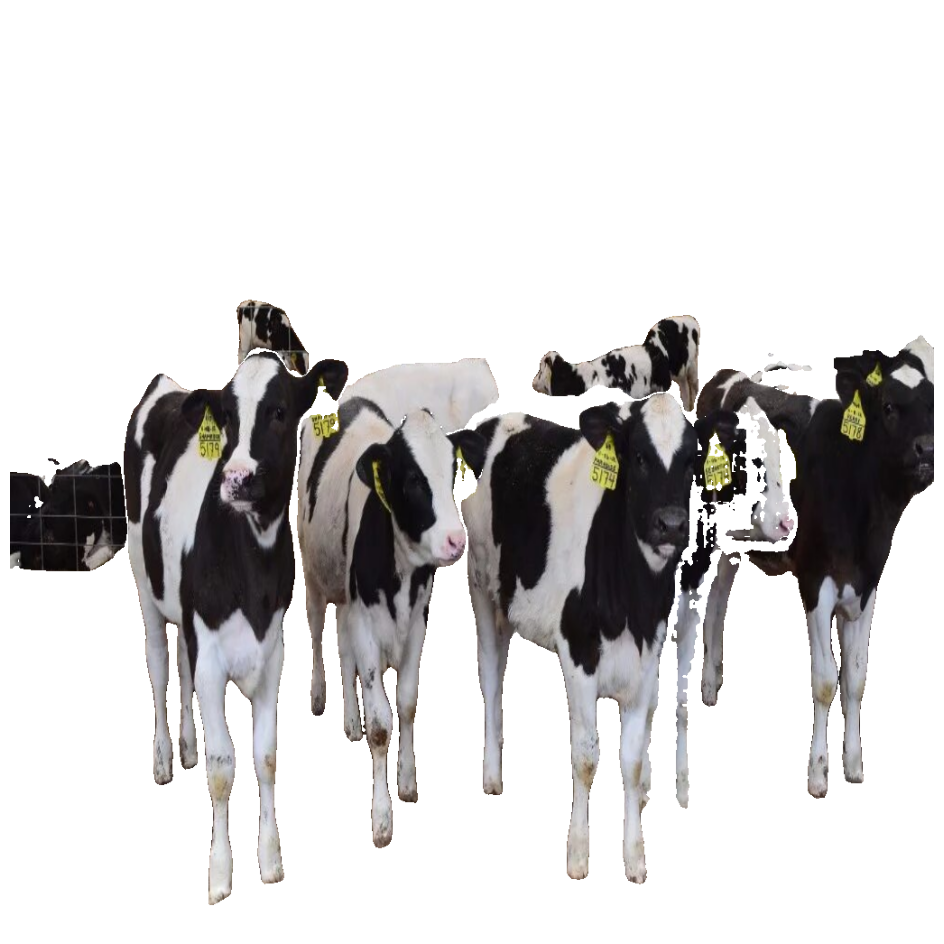

In [43]:
segmented_image[np.where((segmented_image == [0, 0, 0]).all(axis=2))] = [255, 255, 255]
sv.plot_image(segmented_image)

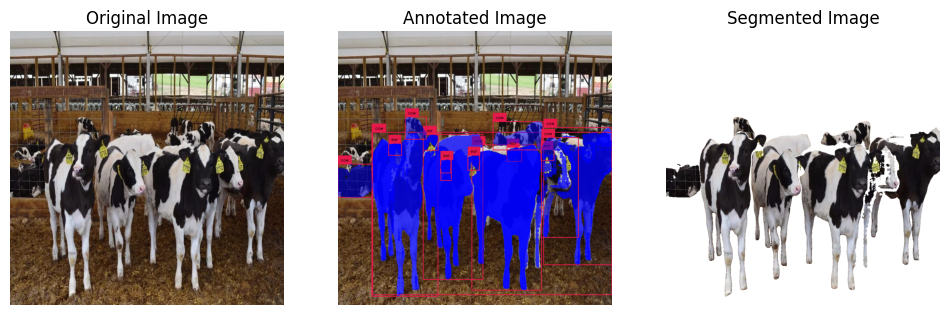

In [44]:
sv.plot_images_grid(
    images=[image_bgr, annotated_image, segmented_image],
    grid_size=(1, 3),
    titles=['Original Image', 'Annotated Image', 'Segmented Image'],
    #size=(48,48)

)